In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, 
                        n_features=2, 
                        noise=10, 
                        random_state=47)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

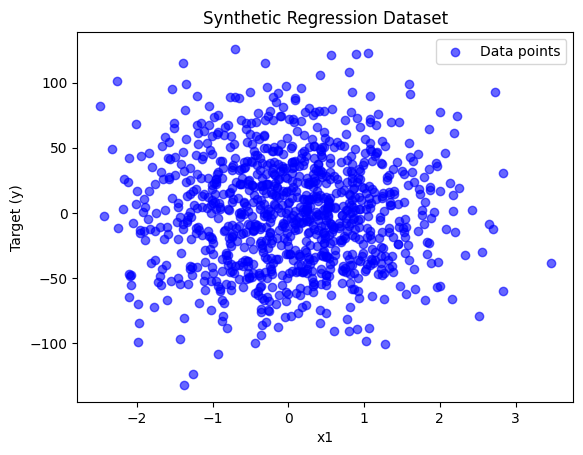

In [4]:
# Visualize the data
plt.scatter(X[:, 0], y, color="blue", alpha=0.6, label="Data points")
plt.title("Synthetic Regression Dataset")
plt.xlabel("x1")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

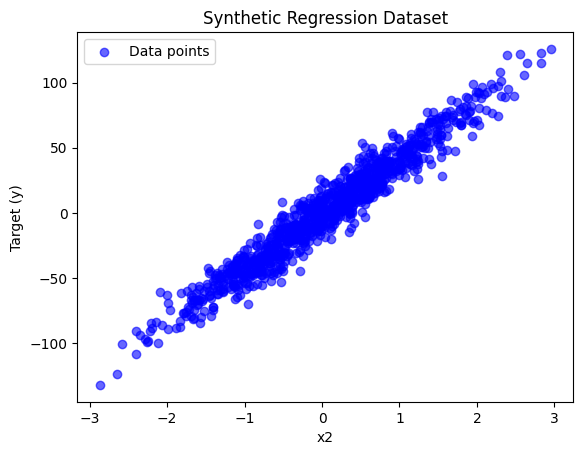

In [5]:
# Visualize the data
plt.scatter(X[:, 1], y, color="blue", alpha=0.6, label="Data points")
plt.title("Synthetic Regression Dataset")
plt.xlabel("x2")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

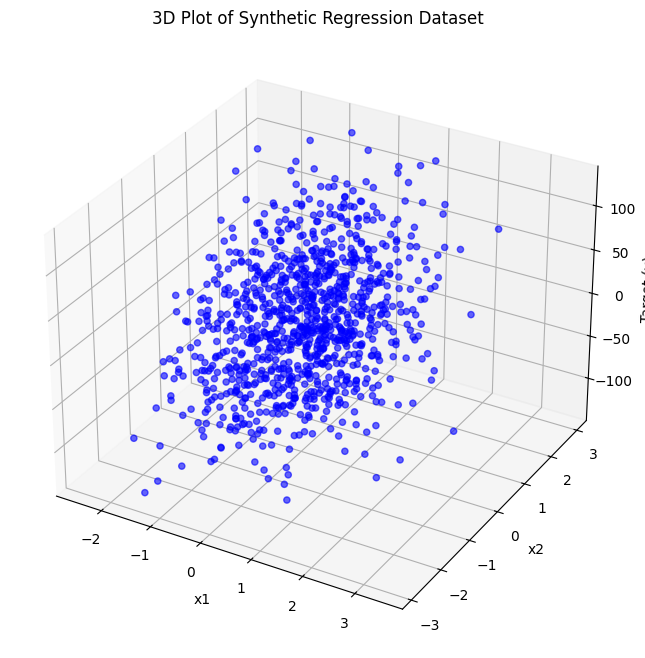

In [6]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="blue", alpha=0.6)

# Set labels
ax.set_title("3D Plot of Synthetic Regression Dataset")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Target (y)")

plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=47)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [9]:

class GradientBoostingRegressorCustom(DecisionTreeRegressor):
    
    def __init__(self, n_estimators, learning_rate, criterion = "squared_error", splitter = "best", max_depth = None, min_samples_split = 2, min_samples_leaf = 1, 
                    min_weight_fraction_leaf = 0, max_features = None, random_state = None, max_leaf_nodes = None, min_impurity_decrease = 0, 
                    ccp_alpha = 0):
        
        super().__init__(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, 
                        min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, 
                        random_state=random_state, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, ccp_alpha=ccp_alpha)
        
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []    # to store each weak learner
        self.initial_model = None  # expected value of the target y
        
    def fit(self, X, y):
        # **Remember the loss function used is `squared_error_loss`**
        # **That's why residuals is (y - F)**
        
        # step1: Initial model F0(X) = E(y) i.e initial prediction
        self.initial_model = np.mean(y)
        F = np.full(y.shape, self.initial_model)
        
        for _ in range(self.n_estimators):
            # calculate the residuals or negative gradients
            residuals = y - F
            
            # Train a weak learner on the residuals
            model = DecisionTreeRegressor(max_depth=self.max_depth, 
                                            criterion=self.criterion,
                                            min_samples_leaf=self.min_samples_leaf,
                                            max_features=self.max_features,
                                            min_samples_split=self.min_samples_split
                                            )
            model.fit(X, residuals)
            
            # Predict residuals and update predictions
            update = self.learning_rate * model.predict(X)
            F += update
            
            # Save the model for later use in predictions
            self.models.append(model)
    
    def predict(self, X):
        # Start with the initial prediction
        F = np.full(X.shape[0], self.initial_model)
        
        for model in self.models:
            F += self.learning_rate * model.predict(X)
        return F
    

In [10]:
gradient_boosting_model_custom = GradientBoostingRegressorCustom(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4
)

gradient_boosting_model_custom.fit(X_train, y_train)

In [11]:
y_pred_train = gradient_boosting_model_custom.predict(X_train)
y_pred_train.shape

(750,)

In [12]:
y_pred = gradient_boosting_model_custom.predict(X_test)
y_pred.shape

(250,)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
mean_squared_error(y_test, y_pred)

124.81938456649593

In [15]:
mean_squared_error(y_train, y_pred_train)

49.33624318743798

In [16]:
r2_score(y_test, y_pred)

0.931783846190924

In [17]:
r2_score(y_train, y_pred_train)

0.9726786980272762

#### **Using from `sklearn.ensemble` `GradientBoostingRegressor`**

In [18]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    criterion = "squared_error"
)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=4)

In [19]:
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_train.shape

(750,)

In [20]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb.shape

(250,)

In [21]:
mean_squared_error(y_test, y_pred_gb)

124.58135917002828

In [22]:
mean_squared_error(y_train, y_pred_gb_train)

49.33624318743798

In [23]:
r2_score(y_test, y_pred_gb)

0.9319139315707894

In [24]:
r2_score(y_train, y_pred_gb_train)

0.9726786980272762